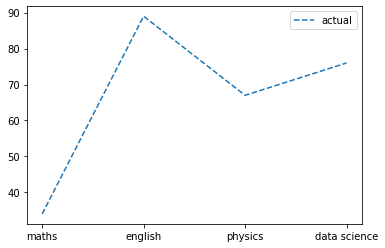

In [1]:
# original marks
marks = [34, 89, 67, 76]
subjects = ['maths', 'english', 'physics', 'data science']

# first predictions
pred1= [50, 50, 50, 50]

# importing the required modules
import matplotlib.pyplot as plt

# actual values
plt.plot(subjects, marks, label='actual' , linestyle='dashed')

# first predictions
# plt.plot(subjects, pred1, label='predicted', c='m')
plt.legend()
plt.show()

In [2]:
# importing the required modules
from sklearn import datasets
import pandas as pd
import numpy as np

# loading the iris dataset
dataset = datasets.load_iris()

# converting the data to DataFrame
data = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                     columns= dataset['feature_names'] + ['target'])

# printing the few rows
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
# splitting the dataset into input and output
Input = data.drop('target', axis=1)
Output =data['target']

In [5]:
# importing the module
from sklearn.model_selection import train_test_split

# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.30)

In [7]:
# importing the xgboost module
import xgboost as xgb

# Default parameters
xgboost_clf = xgb.XGBClassifier()

# training the model
xgboost_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [8]:
# printing default parameters values in XGBoost classifier
xgb.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [10]:
# testing the model
xgboost_preds = xgboost_clf.predict(X_test)

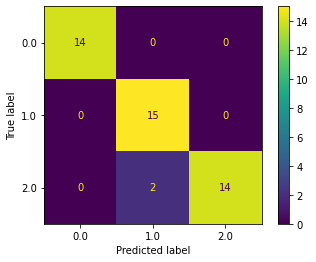

In [11]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix plotting
cm = confusion_matrix(y_test,xgboost_preds, labels=xgboost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgboost_clf.classes_)
disp.plot()
plt.show()

In [13]:
# importing the module
from sklearn.metrics import accuracy_score
# printing
print("The accuracy is: ", accuracy_score(y_test, xgboost_preds))

The accuracy is:  0.9555555555555556
